<a href="https://colab.research.google.com/github/janusis/AIFFEL_Exploration/blob/main/Machine_Learning/10_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 10-2. 머신러닝 프로젝트

### Airbnb(New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
    <참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.
- 데이터 출처 바로가기 : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
    / License CC0: Public Domain

![image.png](attachment:image.png)

### 1. Baseline
라이브러리와 데이터 불러오기

In [ ]:
# 라이브러리
import pandas as pd

In [16]:
# 데이터 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/janusis/AIFFEL_Exploration/main/Machine_Learning/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/janusis/AIFFEL_Exploration/main/Machine_Learning/test.csv')

### 2. EDA(탐색적 데이터 분석)
탐색적으로 데이터 살펴보기

In [17]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [ ]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [18]:
train.iloc[:,3:].describe(),
test.iloc[:,3:].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9779.000000,9779.000000,9779.000000,9779.000000,7721.000000,9779.000000,9779.000000
mean,40.729351,-73.952348,7.186931,23.280908,1.376354,7.356887,111.983332
std,0.054657,0.045361,21.292983,44.398170,1.666277,34.094038,131.417711
min,40.507080,-74.242850,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690265,-73.982600,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723390,-73.955280,3.000000,5.000000,0.720000,1.000000,44.000000
75%,40.763815,-73.936100,5.000000,24.000000,2.040000,2.000000,222.000000
max,40.913060,-73.716900,1000.000000,597.000000,19.750000,327.000000,365.000000


In [19]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [20]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [21]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

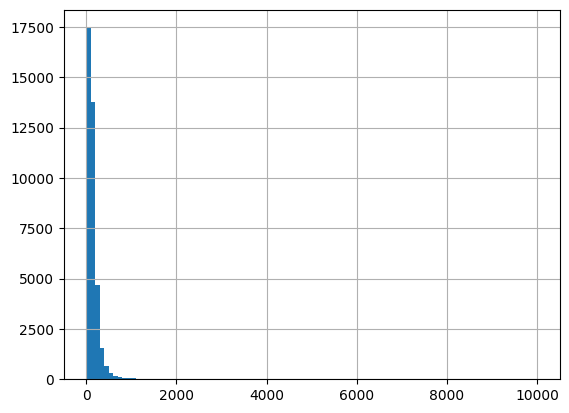

In [22]:
# target(hist)
train['price'].hist(bins=100)

히스토그램 (Histogram)은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급, 세로축은 도수 (횟수나 개수 등)를 나타낸다.

hist() 함수의 bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정한다.
bins 값을 지정하지 않아서 기본값인 10으로 지정된다.

In [23]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

### 3. 데이터 전처리
데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

In [25]:
# TIP. 금액의 편차가 심하기 때문에 로그치환을 통해 값을 변환하여 머신러닝에서 모델의 예측 확률을 올릴 수 있다.
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])  # 로그 치환
print(np.expm1(np.log1p(train['price'])[:3]))  # 로그로 치환된 값을 원래 값으로 반환

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<Axes: >

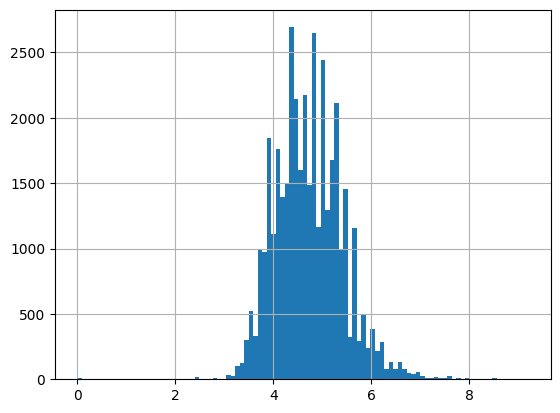

In [26]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [27]:
train['price'].describe()

count    39116.000000
mean         4.737628
std          0.694731
min          0.000000
25%          4.248495
50%          4.663439
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [28]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

# train.drop(['id', 'name', 'host_name', 'host_id', 'last_review'], axis=1, inplace=True)
# test.drop(['id', 'name', 'host_name', 'host_id', 'last_review'], axis=1, inplace=True)

In [29]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31122.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,4.737628,6.990720,23.272855,1.372444,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,0.694731,20.310323,44.589170,1.683963,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,4.248495,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,4.663439,2.000000,5.000000,0.710000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.170484,5.000000,23.000000,2.010000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,9.210440,1250.000000,629.000000,58.500000,327.000000,365.000000


In [30]:
# 결측치 채우기
# train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
# test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
train['reviews_per_month'].fillna(0, inplace=True)
test['reviews_per_month'].fillna(0, inplace=True)

In [31]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### Data Visualisation

<ipython-input-32-cd38aae22d97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

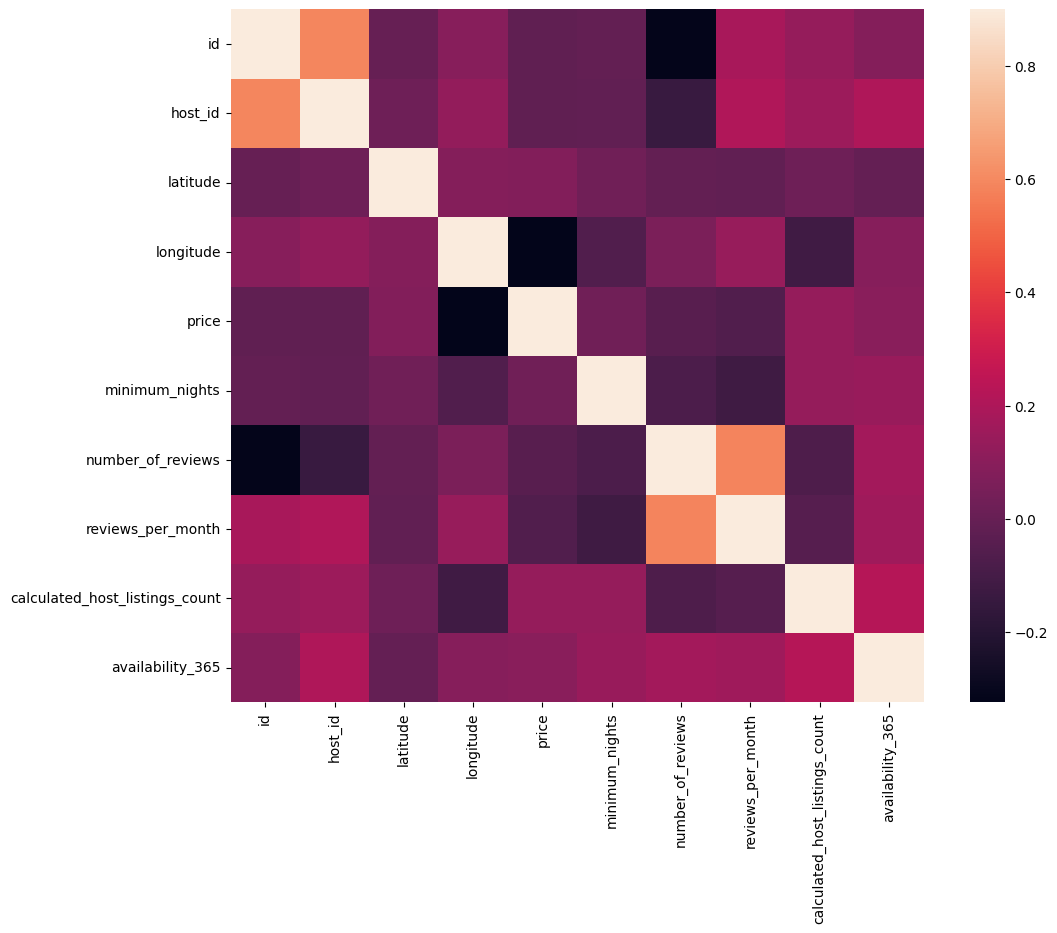

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Neighbourhood group

In [33]:
train['neighbourhood_group'].value_counts()

Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: neighbourhood_group, dtype: int64

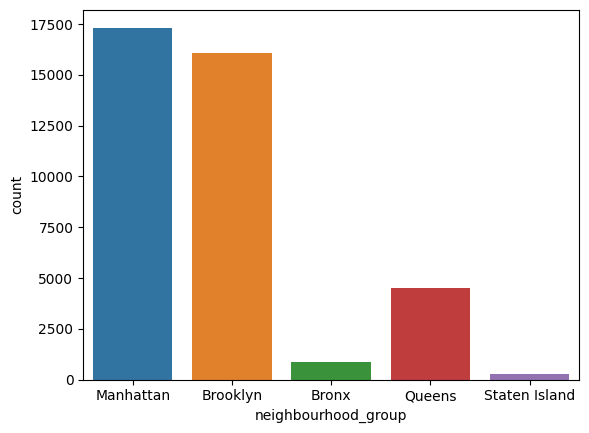

In [34]:
ax = sns.countplot(x="neighbourhood_group", data=train)

### Neighbourhood

In [35]:
df = pd.DataFrame(train['neighbourhood'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
df

,neighbourhood,count
0,Williamsburg,3099
1,Bedford-Stuyvesant,2953
2,Harlem,2114
3,Bushwick,1981
4,Hell's Kitchen,1557
...,...,...
216,Silver Lake,1
217,Richmondtown,1
218,Willowbrook,1
219,New Dorp,1


In [36]:
!pip install plotly

In [37]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(
    x=df['neighbourhood'],y=df['count'],
    marker={'color': df['count'],
    'colorscale': 'Viridis'},
    text=df['count'],
    textposition = "outside",
))
fig.update_layout(xaxis_title="Neighbourhood",yaxis_title="count")
fig.show()

### Room Type

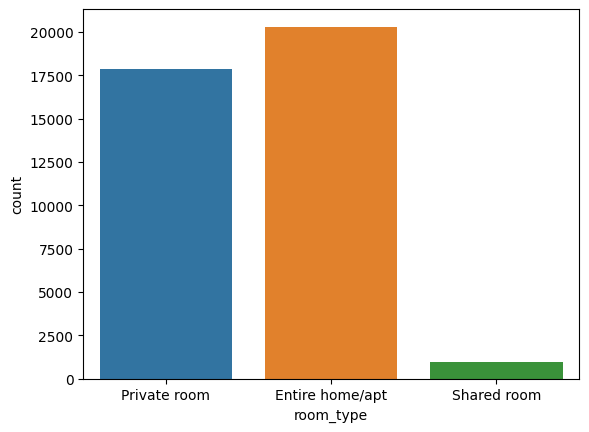

In [38]:
ax = sns.countplot(x="room_type", data=train)

### Neighbourhood vs availability of room

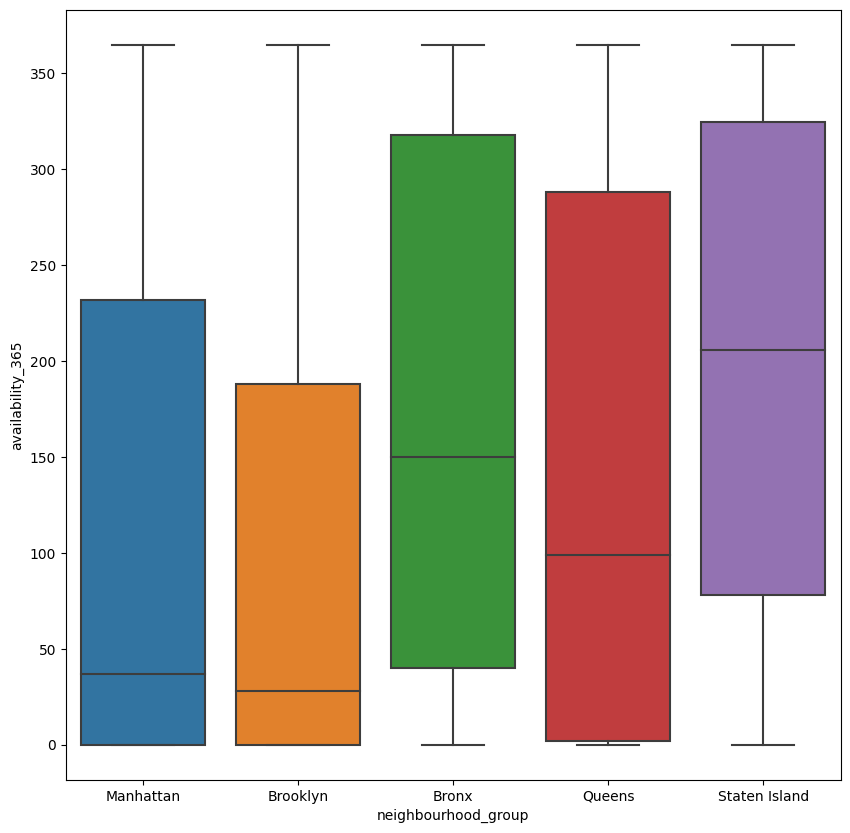

In [39]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=train, x='neighbourhood_group',y='availability_365')

### Room type vs availability

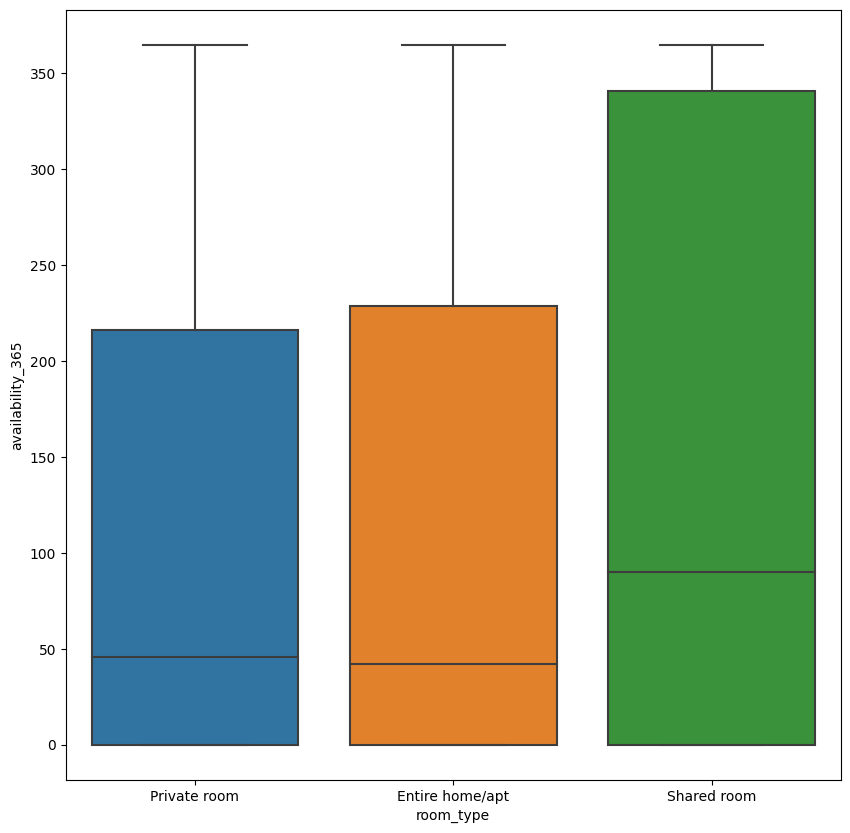

In [40]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=train, x='room_type',y='availability_365')

### Map of New York with neighbourhood groups

In [41]:
import plotly.express as px

fig = px.scatter(train, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

### Feature engineering

In [42]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [44]:
# 수치형 피처 선택
# 수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()  # exclude='object' - 오브젝트 타입이 아닌 수치형 데이터만
c_train = train.select_dtypes(include='object').copy()  # include='object' - 범주형 데이터만
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

n_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(n_train.head(2))

n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0
1,9458704,49015331,40.76037,-73.99016,2,64,1.68,2,262


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000
1,9458704,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808


In [46]:
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [47]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [48]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(2))

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

display(c_train.head(2))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room
1,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,Manhattan,Hell's Kitchen,Entire home/apt


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1
1,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,2,95,0


In [ ]:
# # Encoding categorical variables
# data_train['room_type'] = data_train['room_type'].factorize()[0]
# data_train['neighbourhood_group'] = data_train['neighbourhood_group'].factorize()[0]

# data_test['room_type'] = data_test['room_type'].factorize()[0]
# data_test['neighbourhood_group'] = data_test['neighbourhood_group'].factorize()[0]

In [49]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)

print(train.shape, test.shape)
train.head(3)

(39116, 14) (9779, 14)


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name,host_name,neighbourhood_group,neighbourhood,room_type
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,Room in South Harlem near Central Park,Gilles,2,94,1
1,9458704,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,2,95,0
2,26871281,0.001595,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,West Village Apartment,Petter,2,209,0


In [50]:
# 피처 선택
cols = [
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365',
        'neighbourhood_group',
        'room_type'
        ]

data_train = train[cols]
data_test = test[cols]

data_train.head(3)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,2,1
1,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,2,0
2,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,2,0


### 4. 검증 데이터 분리
Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [51]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 9), (7824, 9), (31292,), (7824,))

In [52]:
# 로그 치환된 Price의 데이터를 원래 값으로 변환
y_val = np.expm1(y_val)

### 5. 머신러닝

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31292 entries, 16787 to 21373
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        31292 non-null  float64
 1   longitude                       31292 non-null  float64
 2   minimum_nights                  31292 non-null  float64
 3   number_of_reviews               31292 non-null  float64
 4   reviews_per_month               31292 non-null  float64
 5   calculated_host_listings_count  31292 non-null  float64
 6   availability_365                31292 non-null  float64
 7   neighbourhood_group             31292 non-null  int64  
 8   room_type                       31292 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 2.4 MB


In [54]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

29716.784217870758

In [55]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

29729.02275858111

In [56]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

35380.144658524005

In [57]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

35380.144658524005

In [74]:
# 랜덤포레스트 (성능이 좋아서 많이 사용하는 편)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

25640.60728642657

In [103]:
# Xgboost (성능이 좋아서 많이 사용하는 편)
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=6,
                     learning_rate=0.07,
                     n_estimators=900,
                     subsample=0.7,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

25198.408988514504

https://xgboost.readthedocs.io/en/stable/parameter.html
Xgboost 의 파라미터들.
자주 사용하는게 7~8개 정도이고, 관련 내용을 모른다면 learning_rate 만 조절

In [ ]:
# Lightgbm
!pip install lightgbm

In [117]:
# Lightgbm
from lightgbm import LGBMRegressor
import numpy as np

model = LGBMRegressor(
    max_depth=9,
    learning_rate=0.05,
    n_estimators=700,
    random_state=2022)

# 모델 학습
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 9
[LightGBM] [Info] Start training from score 4.737612
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


25333.74749945876

### 파라미터 튜닝

In [66]:
# 라이브러리 불러오기
from sklearn.model_selection import RandomizedSearchCV   # 설정된 값 내에서 랜덤하게 일부 값만 선택 탐색

In [78]:
# 하이퍼파라미터
params={'learning_rate':[0.1, 0.09, 0.08, 0.07, 0.05, 0.02],
        'max_depth':[3, 5, 7, 9, 10, 11],
        'n_estimators':[100, 300, 500, 600, 700, 800],
        'subsample':[0.9, 0.8, 0.7]
       }

In [79]:
# Random Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs= -1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.09, 0.08, 0.07,
                                                          0.05, 0.02],
                                        'max_depth': [3, 5, 7, 9, 10, 11],
                                        'n_estimators': [100, 300, 500, 600,
                                                         700, 800],
                                        'subsample': [0.9, 0.8, 0.7]})

In [80]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}

### 6. 채점

In [104]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('https://raw.githubusercontent.com/janusis/AIFFEL_Exploration/main/Machine_Learning/y_test.csv')

# Xgboost
pred = model.predict(data_test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

43423.17376497552

In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!